In [1]:
from random import randint
#import seaborn as sns
import numpy as np

In [2]:
N = 100000
v_first = np.zeros(N)
v_min = np.zeros(N)
v_rand = np.zeros(N)

In [3]:
for i in range(N):
    n,p = 10, 0.5
    flips = np.random.binomial(n,p,1000)
    
    first_coin = 0
    min_coin = np.argmin(flips)
    rand_coin = np.random.randint(0,1000)
    
    v_first[i] = flips[first_coin]
    v_min[i] = flips[min_coin]
    v_rand[i] = flips[rand_coin]

In [4]:
print (np.average(v_min))

0.3765


In [27]:
# HW 5,6,7
# generate 2 points
point1 = np.random.uniform(low=-1,high=1,size=2)
point2 = np.random.randint(low=-1, high=1, size=2)
print(point1, point2)
# create a line
target_slope = (point2[1]-point1[1])/(point2[0]-point1[0])
target_yint = point2[1] - target_slope * point2[0]
print(target_slope, target_yint)

[ 0.30876802 -0.62508495] [0 0]
-2.024448493859853 0.0


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

In [48]:
# now we generate N points
N = 100
def genData():
    # generate X
    xcoord = np.random.uniform(low=-1,high=1,size=N*2)
    X = np.array([[ xcoord]])
    X = X.reshape((100,2))
    print(X.shape)
    print(X[0:5])

    # determine y with the target function
    y = (X[:,1] > (X[:,0] * target_slope + target_yint)) * 1
    y[y==0] = -1
    print(y[0:20])
    return (X, y)

def plotData(X):
    linex = [point1[0], point2[0]]
    liney = [point1[1], point2[1]]
    print(linex, liney)
    plt.scatter(X[:,0], X[:,1])
    plt.plot(linex, liney)


In [53]:
# calculate w
def calw(X,y):
    tmp = np.linalg.inv(X.T @ X)
    tmp = tmp @ X.T
    w = tmp @ y
    return w

def cal_label(w, X):
    pred = X @ w

(100, 2)
[[-0.70460708  0.11090455]
 [ 0.66390083 -0.55968415]
 [-0.18475531  0.15163946]
 [ 0.81661968 -0.85187579]
 [-0.82944714  0.9188364 ]]
[-1  1 -1  1 -1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1  1]
[0.3087680164755813, 0] [-0.6250849459060848, 0]
[1.39759641 0.56976751]


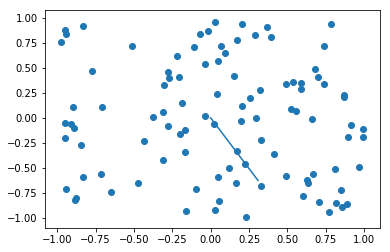

In [54]:
data, label = genData()
plotData(data)
para = calw(data, label)
print(para)